## Importação e Leitura dos Dados


In [11]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("basket_with_rsi_and_ma14.csv")
df = df.dropna()
df.head()


,Date,Close,Open,Price_diff,fng_value,RSI,MA_14
13,2020-09-11,5262.487083,5245.468464,17.018619,41.0,34.701876,5456.804663
14,2020-09-12,5285.290680,5266.942148,18.348532,41.0,35.658919,5418.647137
15,2020-09-13,5222.762695,5290.458913,-67.696218,38.0,30.549799,5368.384965
16,2020-09-14,5403.185851,5225.275051,177.910800,39.0,37.054926,5332.031164
17,2020-09-15,5458.967116,5401.624649,57.342467,47.0,33.864796,5288.831472


## Seleção de Features e Divisão do Dataset

In [12]:
from sklearn.model_selection import train_test_split

# Selecionar features e target
X = df[["Open", "fng_value", "Price_diff", "RSI", "MA_14"]]
y = df["Close"]

# Split sem shuffle por ser série temporal
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


## Treinamento do Modelo AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.8, random_state=42)
ada_model.fit(X_train, y_train)


AdaBoostRegressor(learning_rate=0.8, n_estimators=100, random_state=42)

## Avaliação do Modelo

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = ada_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 8582.418502563762
MAE: 5831.66869001792


## Visualização dos Resultados

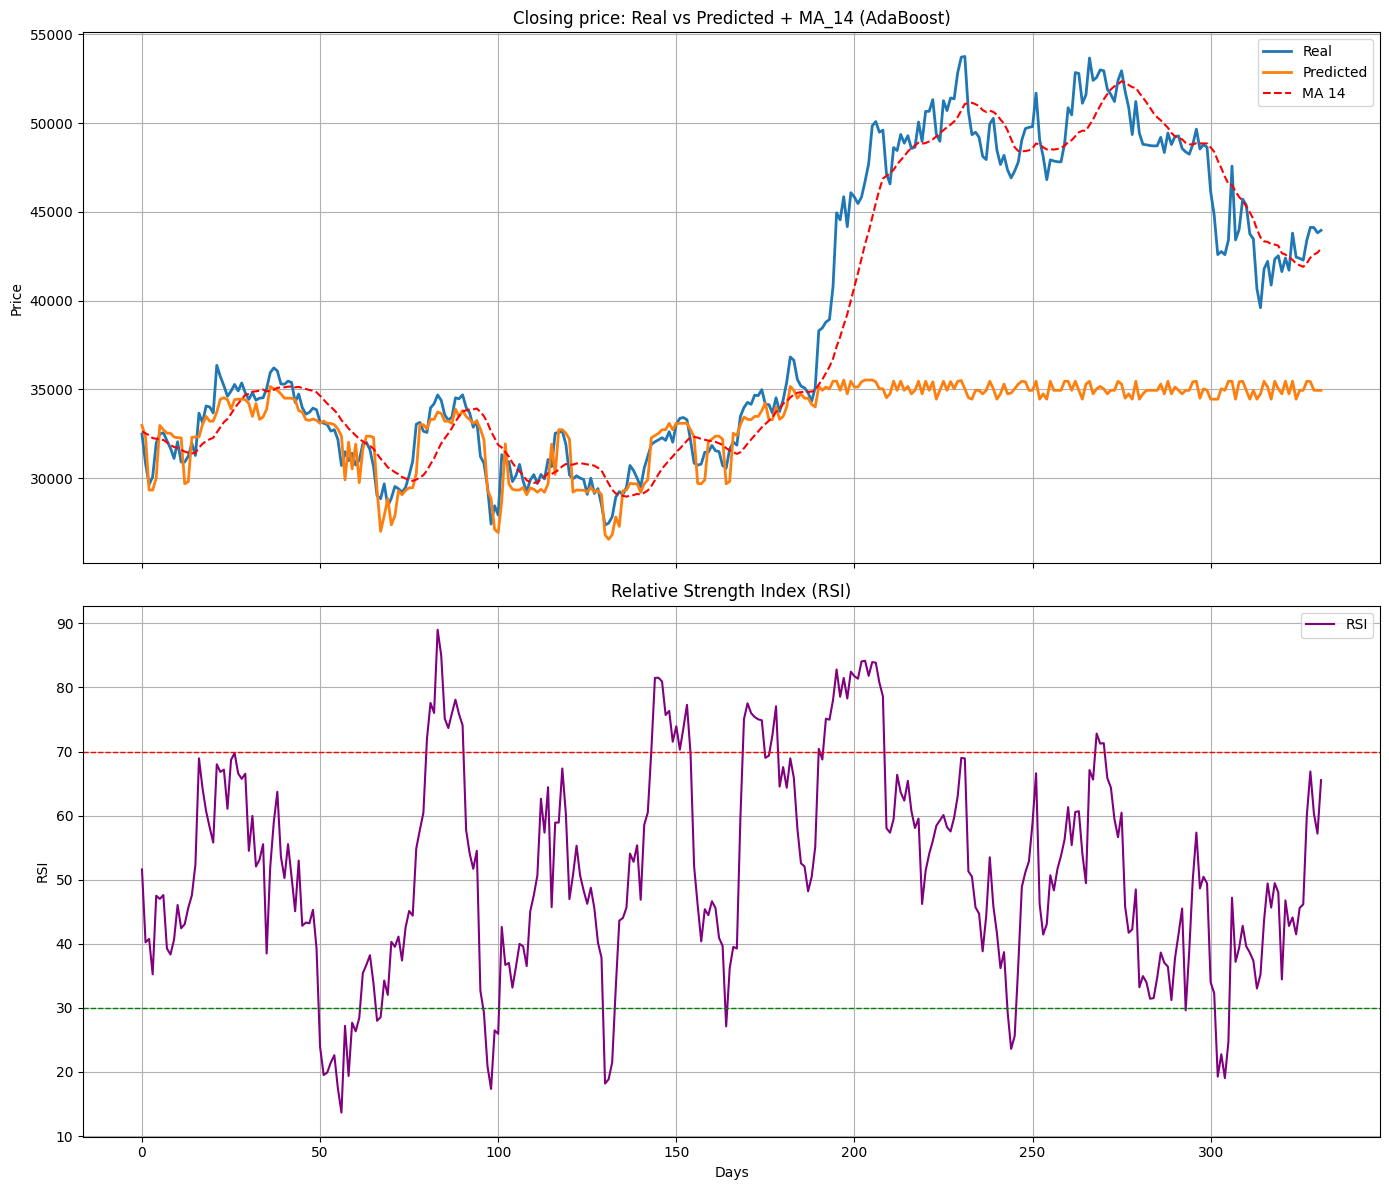

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# 1. Preço Real vs Previsto + MA_14
axs[0].plot(y_test.values, label="Real", linewidth=2)
axs[0].plot(y_pred, label="Predicted", linewidth=2)
axs[0].plot(df["MA_14"].values[-len(y_test):], label="MA 14", color="red", linestyle="--")
axs[0].set_title("Closing price: Real vs Predicted + MA_14 (AdaBoost)")
axs[0].set_ylabel("Price")
axs[0].legend()
axs[0].grid(True)

# 2. RSI
axs[1].plot(df["RSI"].values[-len(y_test):], label="RSI", color="purple")
axs[1].axhline(70, color="red", linestyle="--", linewidth=1)
axs[1].axhline(30, color="green", linestyle="--", linewidth=1)
axs[1].set_title("Relative Strength Index (RSI)")
axs[1].set_ylabel("RSI")
axs[1].set_xlabel("Days")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()